<a href="https://colab.research.google.com/github/sunny-5555/Computer-Vision-Assignments/blob/upload-assignments/a5-vae/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Vision - Assignment 5: Generating Images with Variational Autoencoders

---

Prof. Dr. Markus Enzweiler, Esslingen University of Applied Sciences

markus.enzweiler@hs-esslingen.de

---

This is the fifth assignment for the "Machine Vision" lecture. 
It covers:
* training variational autoencoders and sampling them to generate new images
* starting with existing TensorFlow / Keras code and adapting it to new problems
* datasets used are [MNIST](http://yann.lecun.com/exdb/mnist/) and [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/)

**Make sure that "GPU" is selected in Runtime -> Change runtime type**

To successfully complete this assignment, it is assumed that you already have some experience in Python and numpy. You can either use [Google Colab](https://colab.research.google.com/) for free with a private (dedicated) Google account (recommended) or a local Jupyter installation.

---


## Exercise 1 - Using Variational Autoencoders (VAE) on MNIST (10 points)

This exercise involves working with existing TensorFlow / Keras code and experimenting with the code. 



1.   Work through the [TensorFlow Convolutional Variational Autoencoder Tutorial](https://www.tensorflow.org/tutorials/generative/cvae) that trains a VAE on MNIST. It involves encoding 28x28 pixel MNIST images into **2(!) latent dimensions** and reconstructing the images from those 2 dimensions. Copy the tutorial to your Colab (or local) workspace and run the Jupyter notebook. Try to understand the main concepts in this tutorial, such as data, encoder/decoder CNN architecture, latent feature space, as we have seen in the lecture. **Do not get lost in details, such as the exact loss formulation and exact sampling procedure from the model (although it might be hard for TIB / SWB students ...).** 
2.   Make the following adaptations to the code:

*   Visualize the original input test samples next to their reconstructed versions in the function ```generate_and_save_images()```
*   Create a function to sample random samples from the VAE model. Sample 100 images and display them. *Hint: Have a look at ```model.sample()```*
* Experiment with different values for the dimensions of the latent feature space. Besides 2 latent dimensions, also try 8, 32, and 128. How does the quality of the reconstructions and random samples change with the dimensionality of the latent feature space? *Hint: You need to disable ```plot_latent_images()``` for latent feature spaces with more than 2 dimensions.*









Antwort: Reconstructions werden qualitativ besser und random samples werden qualitativ schlechter.

## Exercise 2 - Generating virtual faces with Variational Autoencoders (10 points) 

---

Adapt your code from exercise 1 to use the [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/) dataset instead of MNIST. The goal is to train a VAE model that allows to reconstruct existing and sample novel face images. 

1. Integrate the code provided below to download, extract and preprocess the LFW dataset into your existing VAE MNIST code. We will be using images of size 64 x 64 pixels (instead of 28 x 28 pixels in the case of MNIST). Additionally, LFW involves three-channel RGB color images. We need to account for both differences in the encoder / decoder CNN architecture. Also, when displaying images, make sure to display all channels, e.g. ```plt.imshow(lfwDataset[i, :, :, :])```. 

2. Split the LFW dataset (13233 images) into 11233 training images and 2000 test images. *Hint: You can use [sklearn.model_selection.train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for that. Your output should then correspond to ```train_images``` and ```test_images``` in the VAE MNIST tutorial (exercise 1).*

3. Adapt the encoder / decoder CNN architecture from the MNIST VAE as follows:

 **Encoder (64x64x3 images -> 2*32 latent dimensions (mean and variance per latent dimension))**
 *   [InputLayer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/InputLayer) with ```input_shape=(64,64,3)```(64x64 images with three channels, RGB)
 *   [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) with 32 filters, 3x3 kernels, strides of 2x2, and ReLU activation (tensor dimensions: 64x64x3 -> 31x31x32) 
 *   [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) with 32 filters, 3x3 kernels, strides of 2x2, and ReLU activation (tensor dimensions: 31x31x32 -> 15x15x32) 
 *   [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) with 64 filters, 3x3 kernels, strides of 2x2, and ReLU activation (tensor dimensions: 15x15x32 -> 7x7x64) 
 *   [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) with 128 filters, 3x3 kernels, strides of 2x2, and ReLU activation (tensor dimensions: 7x7x64 -> 3x3x128) 
 * [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)  (tensor dimensions: 3x3x128 -> 1152)
 * [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) with ```latent_dim + latent_dim``` dimensions (predict mean and variance per latent dimension) (tensor dimensions: 1152 -> 64)

 The encoder should look as follows (output of ```self.encoder.summary()```):

 ```
    Model: "sequential_6"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    conv2d_15 (Conv2D)           (None, 31, 31, 32)        896       
    _________________________________________________________________
    conv2d_16 (Conv2D)           (None, 15, 15, 32)        9248      
    _________________________________________________________________
    conv2d_17 (Conv2D)           (None, 7, 7, 64)          18496     
    _________________________________________________________________
    conv2d_18 (Conv2D)           (None, 3, 3, 128)         73856     
    _________________________________________________________________
    flatten_3 (Flatten)          (None, 1152)              0         
    _________________________________________________________________
    dense_6 (Dense)              (None, 64)                73792     
    =================================================================
    Total params: 176,288
    Trainable params: 176,288
    Non-trainable params: 0
 ```

 **Decoder (32 latent dimensions -> 64x64x3 images)**

 The overall decoder architecture uses the following principle: Fully connect 32 input neurons (number of latent feature dimensions) to a grid of 16x16x32 neurons. With transposed convolutions (with the *correct* strides, kernel sizes and padding) we can subsequently increase tensor dimensions from 16x16x32 up to 64x64x128. For the last layer, a convolutional layer with three different filter kernels of size 1x1x128 (!) are used to shrink the 64x64x128 tensor to 64x64x3, our output image size. 1x1 convolutions might not seem intutive, but they can be used to shrink down feature maps in the ```depth``` dimension, without affecting the spatial x,y dimensions of the output, e.g. see [this explanation](https://machinelearningmastery.com/introduction-to-1x1-convolutions-to-reduce-the-complexity-of-convolutional-neural-networks/) for more info on that (if you want ....). Remember that in CNNs all convolution filters always extend to the full depth of the input tensor volume, as we have seen in the lecture. 

 *   [InputLayer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/InputLayer) with ```input_shape=(32)```(32 latent dimensions)
 * [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) with ```units=16*16*32, activation=tf.nn.relu``` (tensor dimensions: 32 -> 8192)
 * [Reshape](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Reshape) with ```target_shape=(16, 16, 32)``` (tensor dimensions: 8192 -> 16x16x32)
 *  [Conv2DTranspose](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose) with 64 filters, 3x3 kernels, strides of 2x2, "same" padding, and ReLU activation (tensor dimensions: 16x16x32 -> 32x32x64) 
 *  [Conv2DTranspose](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose) with 128 filters, 3x3 kernels, strides of 2x2, "same" padding, and ReLU activation (tensor dimensions: 32x32x64 -> 64x64x128) 
 * [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) with 3 filters, 1x1 kernels, strides of 1x1, "same" padding and **no activation function** (tensor dimensions: 64x64x128 -> 64x64x3)

  The decoder should look as follows (output of ```self.decoder.summary()```):

    ```
    Model: "sequential_11"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    dense_11 (Dense)             (None, 8192)              270336    
    _________________________________________________________________
    reshape_5 (Reshape)          (None, 16, 16, 32)        0         
    _________________________________________________________________
    conv2d_transpose_20 (Conv2DT (None, 32, 32, 64)        18496     
    _________________________________________________________________
    conv2d_transpose_21 (Conv2DT (None, 64, 64, 128)       73856     
    _________________________________________________________________
    conv2d_29 (Conv2D)           (None, 64, 64, 3)         387       
    =================================================================
    Total params: 363,075
    Trainable params: 363,075
    Non-trainable params: 0
    ```



4. Train your LFW VAE using 32 latent feature dimensions for 50 epochs on your training set. Similar to exercise 1, visualize the original input test samples next to their reconstructed versions in the function ```generate_and_save_images()``` and generate 100 virtual random face samples from your VAE model. Which features of persons (e.g. hair, head pose, skin color, clothing, ...) have been learned by the model and which features are not present?

### Code for LFW dataset handling

In [ ]:
# Installs & Imports

!pip install progress
!pip install scikit-learn

# Python stuff
import os
import glob
import tarfile
import urllib.request
import time
from IPython import display

# OpenCV and other image handling
import cv2   
import imageio
import PIL

# NumPy                    
import numpy as np   

# TensorFlow
import tensorflow as tf
import tensorflow_probability as tfp

# Matplotlib    
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# make sure we show all plots directly below each cell
%matplotlib inline 

# scikit-learn
from sklearn.model_selection import train_test_split

In [ ]:
# Code for loading, extracting and pre-processing the LFW dataset. 
# Returns lfwDataset[i,:,:,:] with i being the image index.  


def loadLFWDataset(imgWidth, imgHeight):
  '''
  Load, extract and pre-process the LFW dataset. Images will be converted to 
  RGB and re-scaled to 0-1 (float). 

  Args: 
    imgWidth: target image width
    imgHeight: target image height

  Returns:
    lfwDataset[i,:,:,:] with i being the image index, followed by height, width, channels
  '''

  # load and untar the LFW dataset into the runtime
  url = "http://vis-www.cs.umass.edu/lfw/lfw.tgz"
  pathToTar = "./lfw.tgz"
  print("Downloading LFW data from {} to {}".format(url, pathToTar))
  urllib.request.urlretrieve(url, pathToTar)

  print("Extracting {}".format(pathToTar))
  with tarfile.open(pathToTar) as tar_ref:
      tar_ref.extractall("")

  # get a list of paths to the individual images
  images = glob.glob('lfw/*/' + "*.jpg")
  print("Number of extracted images : {}".format(len(images)))

  # preprocess the images
  lfwDataset = np.zeros([len(images), imgHeight, imgWidth, 3]).astype('float32')

  i = 0
  for imagePath in images:
    # read image
    image = cv2.imread(imagePath)  
    # convert to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # resize and rescale to 0-1 (float)
    resized = cv2.resize(image, (imgHeight, imgWidth), interpolation = cv2.INTER_AREA)
    lfwDataset[i,:,:,:] = (resized / 255.0).astype('float32')
    i = i + 1
    if not (i % 2500):
      print("Preprocessing images: {} / {}".format(i, len(images)))

  print("Done \nDataset shape is {}".format(lfwDataset.shape))
  return lfwDataset

In [ ]:
# load LFW dataset
imgWidth  = 64
imgHeight = 64
lfwDataset = loadLFWDataset(imgWidth, imgHeight);
numLfwImages = lfwDataset.shape[0]

Extracting ./lfw.tgz
Number of extracted images : 13233
Preprocessing images: 2500 / 13233
Preprocessing images: 5000 / 13233
Preprocessing images: 7500 / 13233
Preprocessing images: 10000 / 13233
Preprocessing images: 12500 / 13233
Done 
Dataset shape is (13233, 64, 64, 3)


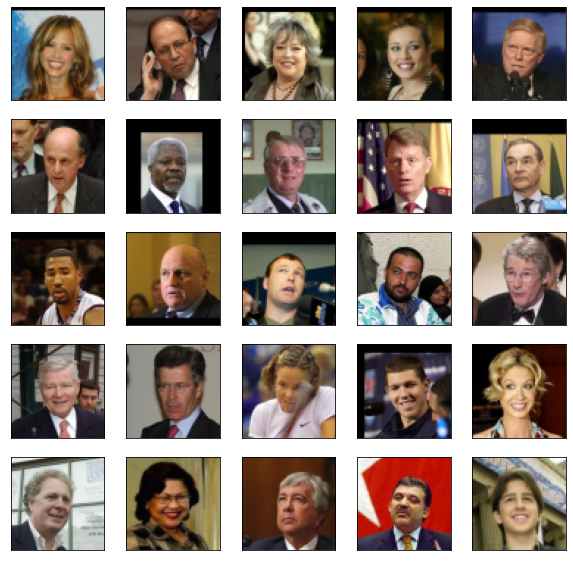

In [ ]:
# visualize some random samples from the dataset
plt.figure(figsize=(10,10))
indices = np.arange(numLfwImages)
np.random.shuffle(indices)
count=0
for i in indices[0:25]:
    plt.subplot(5,5,count+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(lfwDataset[i,:,:,:])
    count = count+1
plt.show()

In [ ]:
def preprocess_images(images):
  images = images.reshape((images.shape[0], 64, 64, 3)) / 255.
  return np.where(images > .5, 1.0, 0.0).astype('float32')

images = preprocess_images(lfwDataset)

train_size = 11233
batch_size = 32
test_size = 2000

train_images, test_images = train_test_split(lfwDataset, test_size=test_size, train_size=train_size)

train_dataset = (tf.data.Dataset.from_tensor_slices(train_images)
                 .shuffle(train_size).batch(batch_size))
test_dataset = (tf.data.Dataset.from_tensor_slices(test_images)
                .shuffle(test_size).batch(batch_size))

In [ ]:
class CVAE(tf.keras.Model):
  """Convolutional variational autoencoder."""

  def __init__(self, latent_dim):
    super(CVAE, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(64, 64, 3)),
            tf.keras.layers.Conv2D(
                filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(
                filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(
            filters=128, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            # No activation
            tf.keras.layers.Dense(latent_dim + latent_dim),
        ]
    )
    self.encoder.summary()

    self.decoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
            tf.keras.layers.Dense(units=16*16*32, activation=tf.nn.relu),
            tf.keras.layers.Reshape(target_shape=(16, 16, 32)),
            tf.keras.layers.Conv2DTranspose(
                filters=64, kernel_size=3, strides=(2, 2), padding='same',
                activation='relu'),
            tf.keras.layers.Conv2DTranspose(
                filters=128, kernel_size=3, strides=(2, 2), padding='same',
                activation='relu'),
            tf.keras.layers.Conv2D(
                filters=3, kernel_size=1, strides=(1, 1), padding='same',
                activation='relu'),
        ]
    )
    self.decoder.summary()

  @tf.function
  def sample(self, eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100, self.latent_dim))
    return self.decode(eps, apply_sigmoid=True)

  def encode(self, x):
    mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
    return mean, logvar

  def reparameterize(self, mean, logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean

  def decode(self, z, apply_sigmoid=False):
    logits = self.decoder(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs
    return logits

optimizer = tf.keras.optimizers.Adam(1e-4)


def log_normal_pdf(sample, mean, logvar, raxis=1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)


def compute_loss(model, x):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)
  cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
  logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)
  return -tf.reduce_mean(logpx_z + logpz - logqz_x)


@tf.function
def train_step(model, x, optimizer):
  """Executes one training step and returns the loss.

  This function computes the loss and gradients, and uses the latter to
  update the model's parameters.
  """
  with tf.GradientTape() as tape:
    loss = compute_loss(model, x)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

Epoch: 50, Test set ELBO: -8151.77587890625, time elapse for current epoch: 7.228868007659912


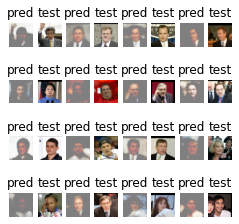

In [ ]:
epochs = 50
# set the dimensionality of the latent space to a plane for visualization later
latent_dim = 32
num_examples_to_generate = 16

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
model = CVAE(latent_dim)

def generate_and_save_images(model, epoch, test_sample):
  mean, logvar = model.encode(test_sample)
  z = model.reparameterize(mean, logvar)
  predictions = model.sample(z)
  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
    plt.subplot(4, 8, 2*i + 1)
    plt.imshow(predictions[i, :, :, :,])
    plt.title('pred')
    plt.axis('off')
    plt.subplot(4, 8, 2*i + 2)
    plt.imshow(test_sample[i, :, :, :])
    plt.title('test')
    plt.axis('off')

  # tight_layout minimizes the overlap between 2 sub-plots
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

  # Pick a sample of the test set for generating output images
assert batch_size >= num_examples_to_generate
for test_batch in test_dataset.take(1):
  test_sample = test_batch[0:num_examples_to_generate, :, :, :]


generate_and_save_images(model, 0, test_sample)

for epoch in range(1, epochs + 1):
  start_time = time.time()
  for train_x in train_dataset:
    train_step(model, train_x, optimizer)
  end_time = time.time()

  loss = tf.keras.metrics.Mean()
  for test_x in test_dataset:
    loss(compute_loss(model, test_x))
  elbo = -loss.result()
  display.clear_output(wait=False)
  print('Epoch: {}, Test set ELBO: {}, time elapse for current epoch: {}'
        .format(epoch, elbo, end_time - start_time))
  generate_and_save_images(model, epoch, test_sample)

(-0.5, 287.5, 287.5, -0.5)

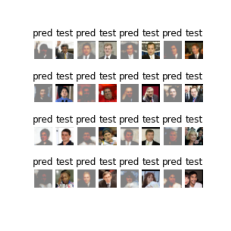

In [ ]:
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

plt.imshow(display_image(epoch))
plt.axis('off')  # Display images

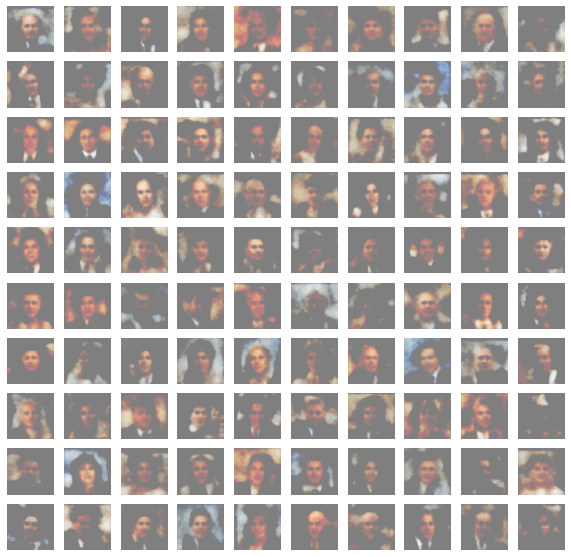

In [ ]:
samples = model.sample()
plt.figure(figsize=(10, 10))
for i in range(samples.shape[0]):
  plt.subplot(10, 10, i+1)
  plt.imshow(samples[i, :, :, :])
  plt.axis('off')